# Understanding and exploring drug reviews using NLP in supervised machine learning algorithms

1.  <a href="#1.-Abstract">Abstract</a>
2.  <a href="#2.-Exploratory data analysis on the given dataset">Exploratory data analysis</a>
3.  <a href="#3.-Data_Visualization">Data Visualization</a>
4.  <a href="#4.-Data Pre-processing and Feature Engineering">Data Pre-processing and Feature Engineering</a>
5.  <a href="#5.-Creating features and Target variables">Creating features and Target variables</a>
6.  <a href="#6.-Machine Learning models ">Machine Learning models</a>
7.  <a href="#7.-Model Validation ">Model Validation</a>
8.  <a href="#8.-Medicine Recommendation">Medicine Recommendation</a>

## 1. Abstract


In this project, I will be using the dataset from the <a href="https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018">UCI ML Drug Review dataset</a>. The aim of this project, is to use the textual reviews to classify the **condition** of a patient and **recommend suitable drug**.
The dataset provides patient reviews on specific drugs along with related conditions and a 10-star patient rating system reflecting overall patient satisfaction. The dataset consist of 7 features and 161297 entries. The 7 features are as mentioned below:
1. uniqueID
2. drugName (Name of a drug used)
3. condition (Condition of a patient)
4. review (Patients opinion on the overall drug effectiveness
5. rating (Based on satisfaction from drug usage. 1 being lowest and 10 being highest)
6. date (date of the entry)
7. UsefulCount (The number of users who found the review useful)



### Import libraries and load the dataset

In [357]:
#Import libraries
import numpy as np #linear algerbra library
import pandas as pd #data processing
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
from sklearn.preprocessing import MinMaxScaler #Scaling data

In [358]:
#Importing the dataset
data = pd.read_csv('drugsComTrain_raw.csv')

## 2. Exploratory data analysis on the given dataset

### 1. Pandas profiling: It can perform an in-depth descriptive statistics and create a rich and interactive suite of the dataset.

In [359]:
#Providing descriptive statistical summary of all the features of the dataset using Pandas profiling
!pip install pandas-profiling==2.7.1


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [360]:
from pandas_profiling import ProfileReport
Profile = ProfileReport(data)
Profile

In [5]:
Profile.to_file("Analysis.html")

**Summary from the report**: There are 4 categorical variables and 3 numerical. There are no missing data except for condition variable which has 0.6% missing data points (899). The birth control shows the highest frequency of 17.8% followed by depression and pain. The review column has characters that are uppercase and lowercase along with other symbols and punctuations. Based on the rating histogram, the highest count is observed for rating of 10 (31.6%). 

### 2. Basic statistical analysis

In [6]:
#Understanding the dataset
data.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [7]:
data.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [8]:
data.shape

(161297, 7)

In [9]:
dict(data.dtypes)

{'uniqueID': dtype('int64'),
 'drugName': dtype('O'),
 'condition': dtype('O'),
 'review': dtype('O'),
 'rating': dtype('int64'),
 'date': dtype('O'),
 'usefulCount': dtype('int64')}

In [10]:
#Missing value Analysis
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
condition,899,0.005574
uniqueID,0,0.000000
drugName,0,0.000000
review,0,0.000000
rating,0,0.000000
date,0,0.000000
usefulCount,0,0.000000


The above analysis represents whats provided in the report for pandas profiling.

## 3. Data Visualization

In [11]:
#Identification of unique values
print(data['drugName'].nunique())
print(data['condition'].nunique())

3436
884


There are 3436 unique drug and 884 conditions listed, indicating that a drug is used to treat multiple conditions. So we will check the number of drugs used per condition. 

Text(0.5, 1.0, 'The number of drugs per condition.')

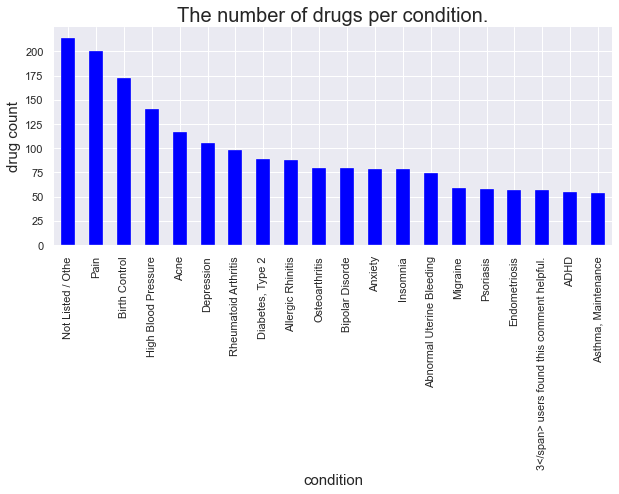

In [313]:
cond_drug = data.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
cond_drug[0:20].plot(kind="bar", figsize = (10,4), fontsize = 11,color="blue")
plt.xlabel("condition", fontsize = 15)
plt.ylabel("drug count", fontsize = 15)
plt.title("The number of drugs per condition.", fontsize = 20)

From the graph above, pain has highest number of drugs followed by birth control and high blood pressure. Now lets look at the drugs that are frequently used in this dataset.

In [13]:
data['drugName'].value_counts()[:15]

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Implanon                              1102
Gabapentin                            1047
Bupropion                             1022
Venlafaxine                           1016
Miconazole                            1000
Name: drugName, dtype: int64

In [14]:
# Lets visualize the drug with highest, lowest and average rating.

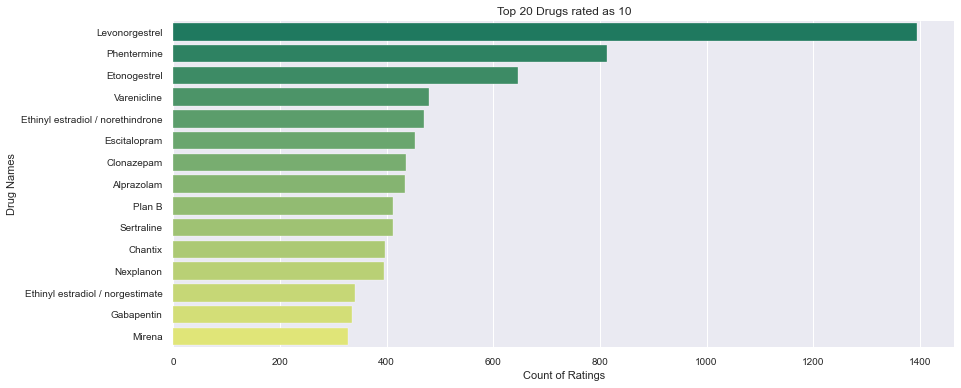

In [15]:
drugs_rating = dict(data[data['rating']==10]['drugName'].value_counts())

top_drugs = list(drugs_rating.keys())[0:15]
values = list(drugs_rating.values())[0:15]
plt.figure(figsize=(14,6))
sns.set_style(style='darkgrid')
sns.barplot(x=values,y=top_drugs,palette='summer')
plt.title('Top 20 Drugs rated as 10')
plt.ylabel('Drug Names')
plt.xlabel('Count of Ratings')
plt.show()

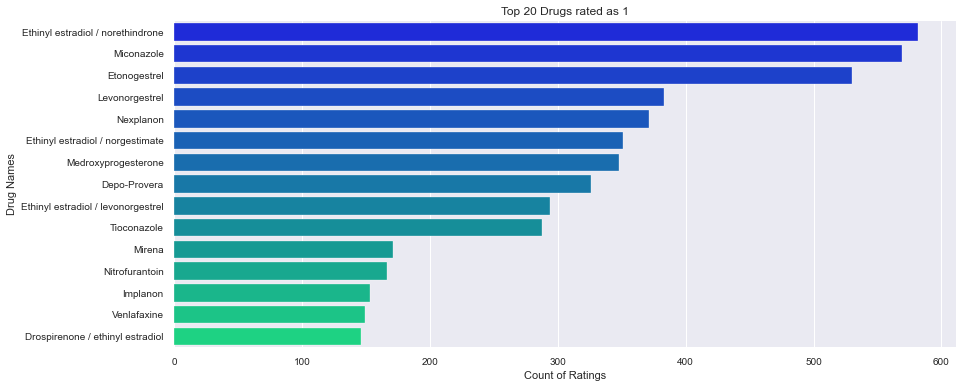

In [16]:
drugs_rating = dict(data[data['rating']==1]['drugName'].value_counts())

top_drugs = list(drugs_rating.keys())[0:15]
values = list(drugs_rating.values())[0:15]
plt.figure(figsize=(14,6))
sns.set_style(style='darkgrid')
sns.barplot(x=values,y=top_drugs,palette='winter')
plt.title('Top 20 Drugs rated as 1')
plt.ylabel('Drug Names')
plt.xlabel('Count of Ratings')
plt.show()

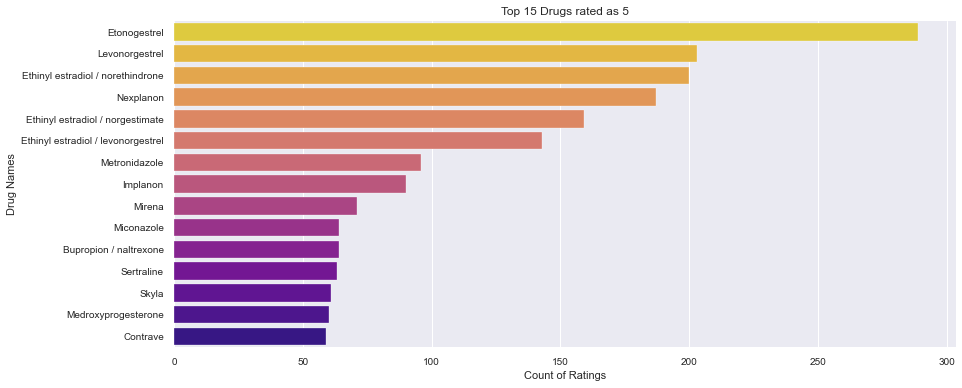

In [17]:
drugs_rating = dict(data[data['rating']==5]['drugName'].value_counts())

top_drugs = list(drugs_rating.keys())[0:15]
values = list(drugs_rating.values())[0:15]
plt.figure(figsize=(14,6))
sns.set_style(style='darkgrid')
sns.barplot(x=values,y=top_drugs,palette='plasma_r')
plt.title('Top 15 Drugs rated as 5')
plt.ylabel('Drug Names')
plt.xlabel('Count of Ratings')
plt.show()

Based on the above graphs, **Levonorgestrel** has highest count with maximum rating (10) whereas **Ethinyl estradiol / norethindrone**  has highest count with minimum rating (1). As per the drug count table, **Levonorgestrel** is used the most followed by **Etonogestrel** and **Ethinyl estradiol / norethindrone**

In [18]:
# conditions that are prescribed to take Levonorgestrel and Ethinyl estradiol / norethindrone
data[data['drugName'] == 'Levonorgestrel']['condition'].unique()

array(['Emergency Contraception', 'Birth Control',
       'Abnormal Uterine Bleeding', nan, 'Not Listed / Othe'],
      dtype=object)

In [19]:
data[data['drugName'] == 'Ethinyl estradiol / norethindrone']['condition'].unique()

array(['Birth Control', nan, 'Menstrual Disorders', 'Endometriosis',
       'Polycystic Ovary Syndrome', 'Acne', 'Abnormal Uterine Bleeding',
       'Postmenopausal Symptoms', 'Not Listed / Othe'], dtype=object)

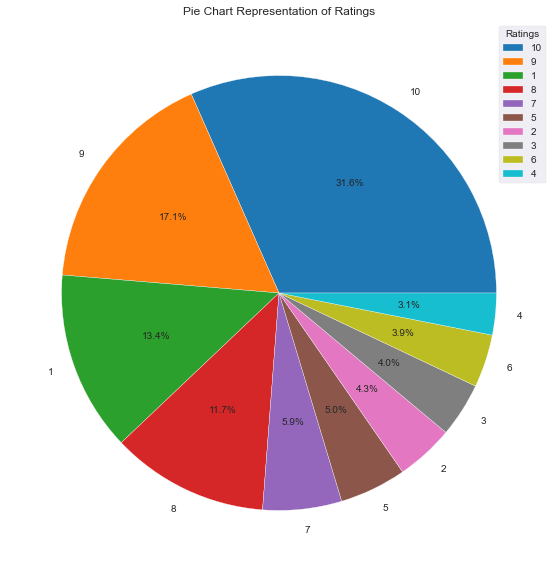

In [20]:
#plotting the percentage distribution of ratings using pie chart

ratings_count = dict(data['rating'].value_counts())
count = list(ratings_count.values())
labels = list(ratings_count.keys())
plt.figure(figsize=(14,10))
plt.pie(count,labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart Representation of Ratings')
plt.legend(title='Ratings')
plt.show()

In [21]:
#Lets now have a look at reviews. 

Text(0.5, 1.0, 'Top10 : The number of reviews per condition.')

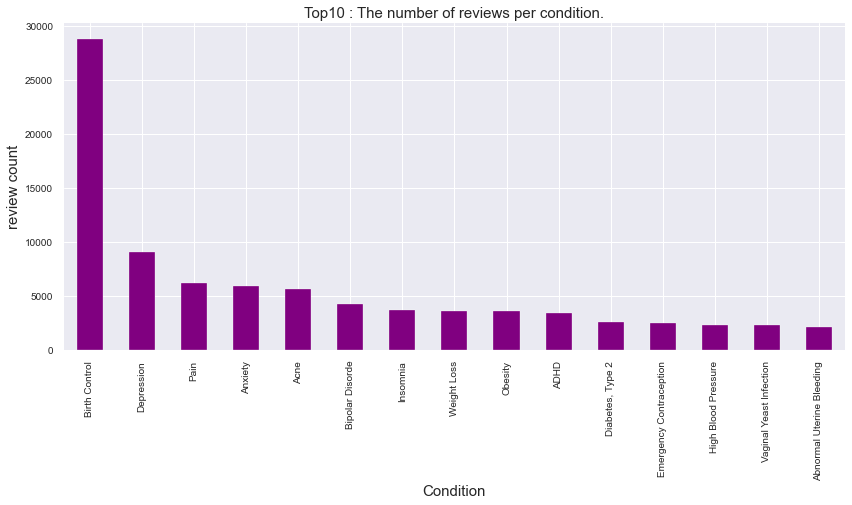

In [22]:
#The number of reviews per condition
drug_count=data.groupby('condition')['drugName'].count().sort_values(ascending=False)
drug_count[0:15].plot(kind="bar", figsize = (14,6), fontsize = 10,color="purple")
plt.xlabel("Condition", fontsize = 15)
plt.ylabel("review count", fontsize = 15)
plt.title("Top10 : The number of reviews per condition.", fontsize = 15)

In [23]:
## The maximum reviews are available for birth control followed by depression and pain

## 4. Data Pre-processing and Feature Engineering

### 4A. Classification of condition of the patient by analyzing the reviews

Lets first select 5 conditions that we would like to work further. Based on the reviews and the various visualization graphs created for conditions, drugs and reviews, I would be selecting Birth control, Depression, Anxiety, Acne and Bipolar Disorder. These are selected based on the Number of reviews available. Although Pain has third most number of reviews, but what kind of pain is not specified. Hence I would not be selecting that.

In [24]:
data_01 = data[(data['condition'] == 'Birth Control') | (data['condition'] == 'Depression') | (data['condition'] == 'Anxiety') | (data['condition'] == 'Acne') | (data['condition'] == 'Bipolar Disorde')]

In [25]:
data_01.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1
11,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,9-Mar-17,54


In [26]:
data_01.shape

(53573, 7)

Lets create a dataframe with essential columns and drop the columns that are not required for further analysis

In [317]:
data_02 = data_01.drop(['date'],axis =1)

In [318]:
data_02.head(5)

,uniqueID,drugName,condition,review,rating,usefulCount
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,32
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,1
11,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,54


Lets check out the words in the reviews that is quite often used for the selected conditions.

In [319]:
#Lets first segregate dataframe for analyzing individual conditions
data_02_birth = data_02[(data_02['condition'] == 'Birth Control')]
data_02_dep = data_02[(data_02['condition'] == 'Depression')]
data_02_diab = data_02[(data_02['condition'] == 'Anxiety')]
data_02_acne = data_02[(data_02['condition'] == 'Acne')]
data_02_bipolar = data_02[(data_02['condition'] == 'Bipolar Disorde')]

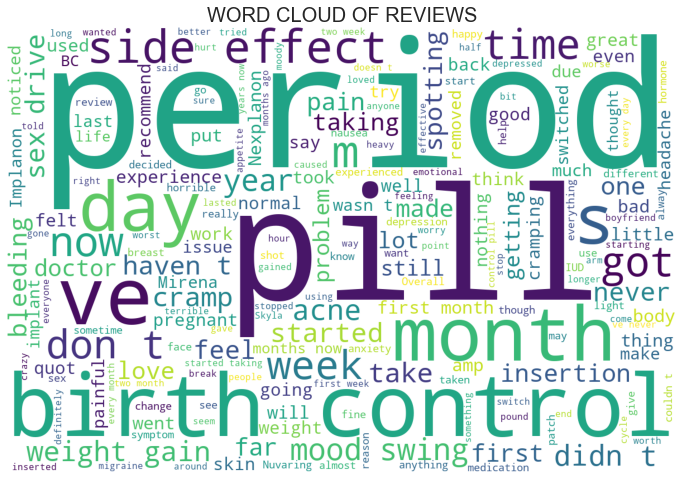

In [320]:
#Do wordcloud for each condition
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(" ".join(data_02_birth.review))
plt.rcParams['figure.figsize'] = (12, 12)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 20)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

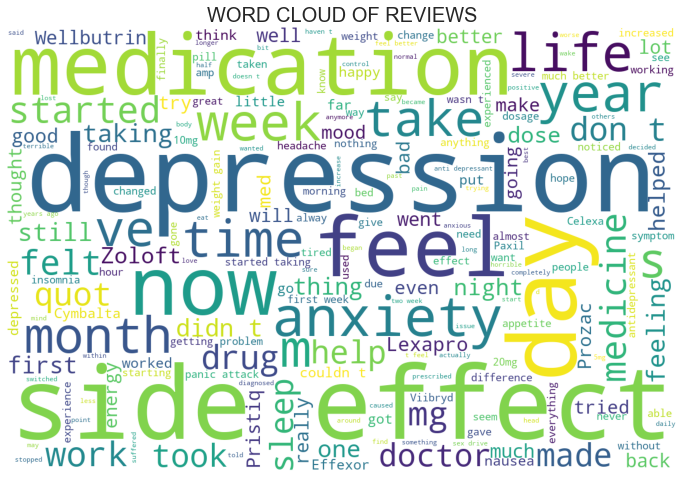

In [321]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(" ".join(data_02_dep.review))
plt.rcParams['figure.figsize'] = (12, 12)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 20)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

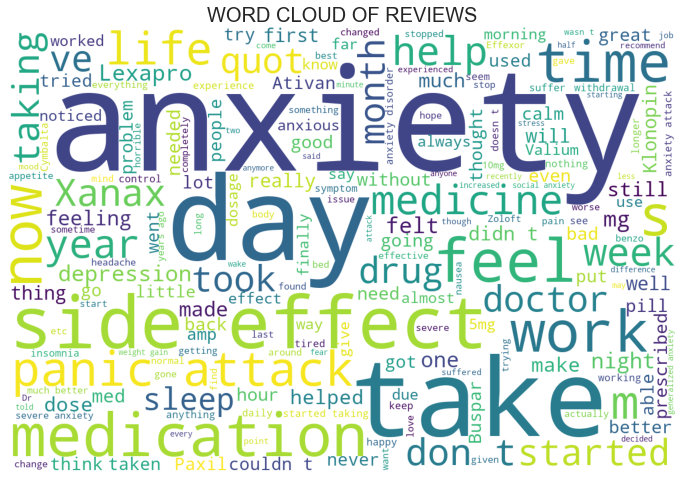

In [322]:
#Do wordcloud for each condition
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(" ".join(data_02_diab.review))
plt.rcParams['figure.figsize'] = (12, 12)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 20)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

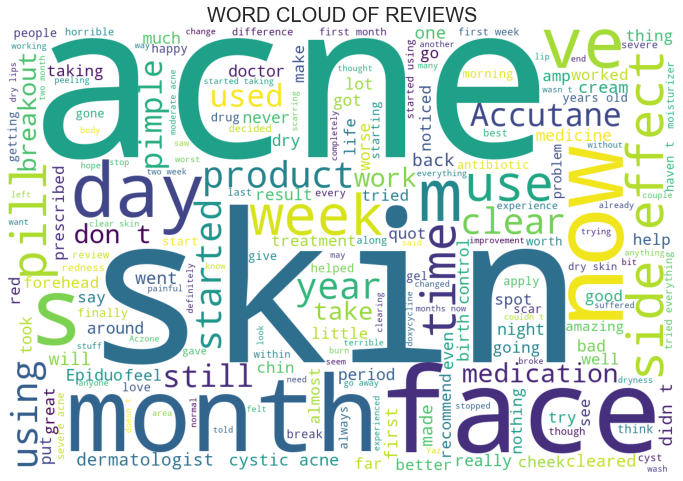

In [323]:
#Do wordcloud for each condition
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(" ".join(data_02_acne.review))
plt.rcParams['figure.figsize'] = (12, 12)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 20)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

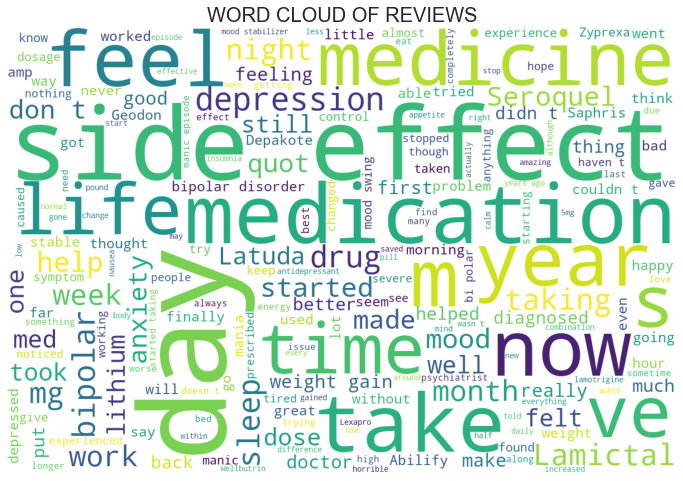

In [324]:
#Do wordcloud for each condition
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(" ".join(data_02_bipolar.review))
plt.rcParams['figure.figsize'] = (12, 12)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 20)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
# Import all necessary libraries for preprocessing of reviews to remove stop wrods, punctuations, special characters, etc

In [325]:
import nltk
import nltk.corpus
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup
import re
import string

In [326]:
#First lets remove punctuations
def remove_punctuation(review):
    lst = []
    for text in review:
        if text not in string.punctuation:
            lst.append(text)
    return "".join(lst)
data_02.review = data_02.review.apply(lambda x: remove_punctuation(x))

In [327]:
def review_clean (raw_review):
    letter_only = re.sub('[^a-zA-Z]', ' ', raw_review)
    words = letter_only.lower().split()
    cleaned_words = [w for w in words if not w in stop]
    lemmitize_words = [lemmatizer.lemmatize(w) for w in cleaned_words]
    return(' '.join(lemmitize_words))

In [328]:
data_02['review_cleaned'] = data_02['review'].apply(review_clean)

## 5. Creating features and target variables

In [314]:
#Comparing the review and review cleaned column

,uniqueID,drugName,condition,review,review_cleaned
2,92703,Lybrel,Birth Control,I used to take another oral contraceptive whic...,used take another oral contraceptive pill cycl...
3,138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,first time using form birth control glad went ...
7,102654,Aripiprazole,Bipolar Disorde,Abilify changed my life There is hope I was on...,abilify changed life hope zoloft clonidine fir...
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,I had been on the pill for many years When my ...,pill many year doctor changed rx chateal effec...
11,75612,L-methylfolate,Depression,I have taken antidepressants for years with so...,taken antidepressant year improvement mostly m...


In [329]:
X = data_02['review_cleaned']
y = data_02['condition']

In [330]:
from sklearn.model_selection import train_test_split

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.3, random_state=42)

In [332]:
X_train.shape

(37501,)

In [333]:
y_train.shape

(37501,)

## 6. Machine Learning models
### 6A-I. BofW with Random forest

In [300]:
# We will use Bag-of-Words (BoW) and TF-IDF for Creating Features from Text
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
count_X_train = vectorizer.fit_transform(X_train)
count_X_test = vectorizer.transform(X_test)

In [363]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators =400,criterion="entropy",random_state =42)
classifier.fit(count_X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=42)

In [302]:
# Predicting the Test set results
y_pred = classifier.predict(count_X_test)

In [303]:
from sklearn.metrics import plot_confusion_matrix

In [304]:
from itertools import product

In [305]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


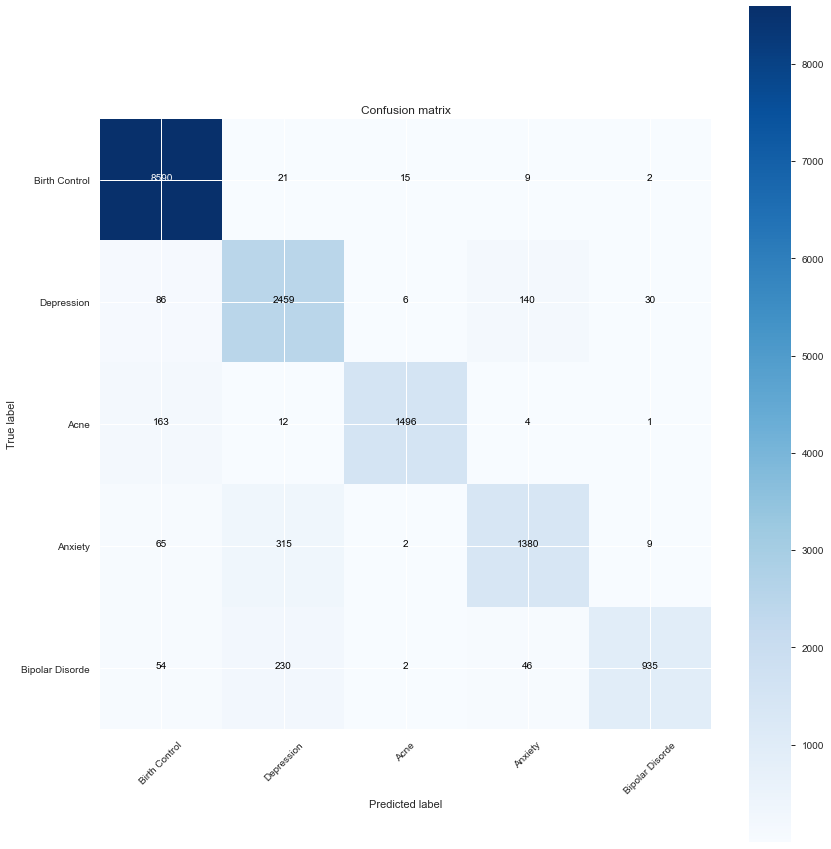

In [306]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred, labels =['Birth Control', 'Depression', 'Acne', 'Anxiety', 'Bipolar Disorde'])
plot_confusion_matrix(cm2, classes=['Birth Control', 'Depression', 'Acne', 'Anxiety', 'Bipolar Disorde'])

In [307]:
from sklearn.metrics import classification_report, accuracy_score

In [308]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

                 precision    recall  f1-score   support

           Acne       0.98      0.89      0.94      1676
        Anxiety       0.87      0.78      0.82      1771
Bipolar Disorde       0.96      0.74      0.83      1267
  Birth Control       0.96      0.99      0.98      8637
     Depression       0.81      0.90      0.85      2721

       accuracy                           0.92     16072
      macro avg       0.92      0.86      0.88     16072
   weighted avg       0.93      0.92      0.92     16072

0.9245893479342957


### 6A-II. BofW with Xgboost

In [296]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
count_X_train = vectorizer.fit_transform(X_train)
count_X_test = vectorizer.transform(X_test)

In [186]:
from xgboost import XGBClassifier

In [187]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [188]:
# fit model no training data
model = XGBClassifier()
model.fit(count_X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [189]:
# make predictions for test data
y_pred = model.predict(count_X_test)
predictions = [round(value) for value in y_pred]

In [190]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("accuracy:  %0.3f" % score)

accuracy:  0.912


### 6A-III. BofW with Passive agressive model

In [169]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
count_X_train = vectorizer.fit_transform(X_train)
count_X_test = vectorizer.transform(X_test)

In [170]:
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression

In [171]:
import sklearn.metrics as metrics

In [172]:
passive = PassiveAggressiveClassifier()
passive.fit(count_X_train, y_train)
pred = passive.predict(count_X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:  %0.3f" % score)

accuracy:  0.912


### 6B-I.  BofW bigram with Random forest

In [295]:
#Bag of words n-gram
vectorizer = CountVectorizer(analyzer = 'word', ngram_range= (2,2))
count_X_train = vectorizer.fit_transform(X_train)
count_X_test = vectorizer.transform(X_test)

In [132]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators =400,criterion="entropy",random_state =42)
classifier.fit(count_X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=42)

In [133]:
# Predicting the Test set results
y_pred = classifier.predict(count_X_test)
from sklearn.metrics import plot_confusion_matrix
from itertools import product

Confusion matrix, without normalization


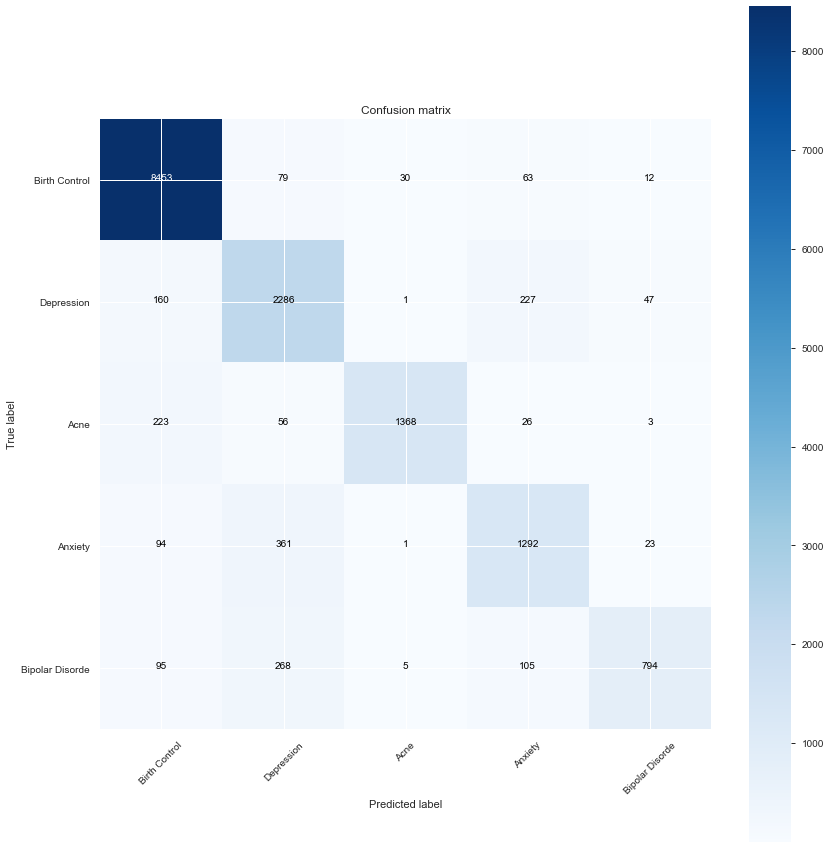

In [136]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred, labels =['Birth Control', 'Depression', 'Acne', 'Anxiety', 'Bipolar Disorde'])
plot_confusion_matrix(cm2, classes=['Birth Control', 'Depression', 'Acne', 'Anxiety', 'Bipolar Disorde'])

In [137]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

                 precision    recall  f1-score   support

           Acne       0.97      0.82      0.89      1676
        Anxiety       0.75      0.73      0.74      1771
Bipolar Disorde       0.90      0.63      0.74      1267
  Birth Control       0.94      0.98      0.96      8637
     Depression       0.75      0.84      0.79      2721

       accuracy                           0.88     16072
      macro avg       0.86      0.80      0.82     16072
   weighted avg       0.89      0.88      0.88     16072

0.8830886012941762


### 6B-II. BofW bigrams with Xgboost

In [203]:
#Bag of words n-gram
vectorizer = CountVectorizer(analyzer = 'word', ngram_range= (2,2))
count_X_train = vectorizer.fit_transform(X_train)
count_X_test = vectorizer.transform(X_test)

In [204]:
from xgboost import XGBClassifier

In [205]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [206]:
# fit model no training data
model = XGBClassifier()
model.fit(count_X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [207]:
# make predictions for test data
y_pred = model.predict(count_X_test)
predictions = [round(value) for value in y_pred]

In [208]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("accuracy:  %0.3f" % score)

accuracy:  0.912


### 6B-III. BofW bigrams Passive aggressive classifier

In [218]:
#Bag of words n-gram
vectorizer = CountVectorizer(analyzer = 'word', ngram_range= (2,2))
count_X_train = vectorizer.fit_transform(X_train)
count_X_test = vectorizer.transform(X_test)

In [219]:
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression

In [220]:
import sklearn.metrics as metrics

In [221]:
passive = PassiveAggressiveClassifier()
passive.fit(count_X_train, y_train)
pred = passive.predict(count_X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:  %0.3f" % score)

accuracy:  0.895


### 6C-I. TF-iDF with Random forest

In [222]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [243]:
#tf idf
tf_idf = TfidfVectorizer(max_df=0.8)
#applying tf idf to training data
X_train_tf = tf_idf.fit_transform(X_train)
#applying tf idf to test data
X_test_tf = tf_idf.transform(X_test)

In [244]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators =400,criterion="entropy",random_state =42)
classifier.fit(X_train_tf,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=42)

In [245]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_tf)
from sklearn.metrics import plot_confusion_matrix
from itertools import product

Confusion matrix, without normalization


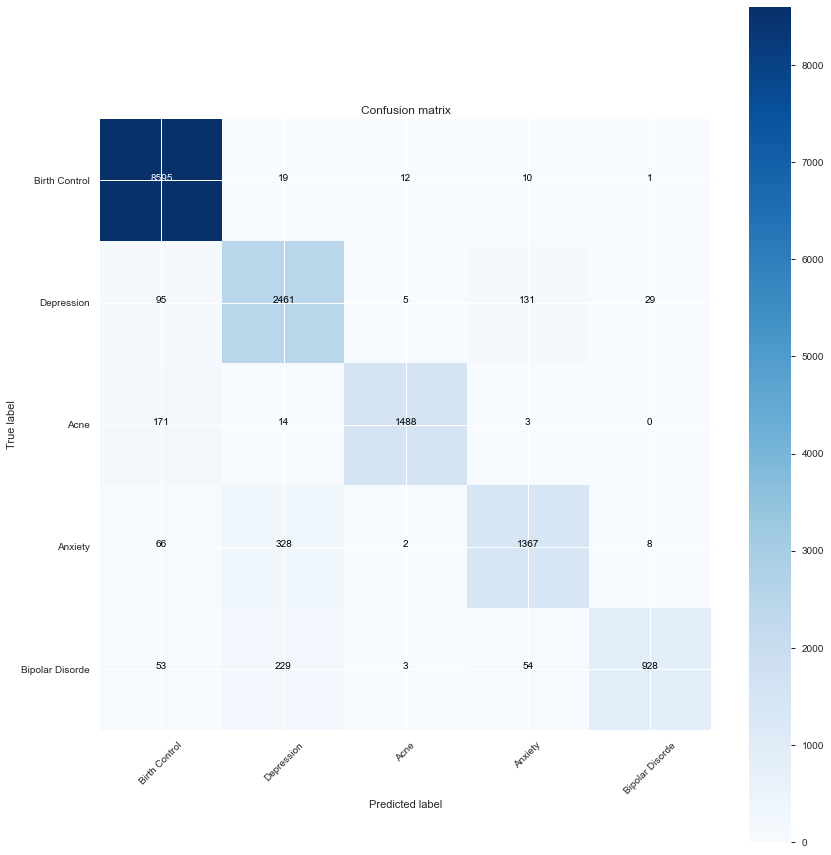

In [248]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred, labels =['Birth Control', 'Depression', 'Acne', 'Anxiety', 'Bipolar Disorde'])
plot_confusion_matrix(cm2, classes=['Birth Control', 'Depression', 'Acne', 'Anxiety', 'Bipolar Disorde'])

In [249]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

                 precision    recall  f1-score   support

           Acne       0.99      0.89      0.93      1676
        Anxiety       0.87      0.77      0.82      1771
Bipolar Disorde       0.96      0.73      0.83      1267
  Birth Control       0.96      1.00      0.98      8637
     Depression       0.81      0.90      0.85      2721

       accuracy                           0.92     16072
      macro avg       0.92      0.86      0.88     16072
   weighted avg       0.93      0.92      0.92     16072

0.9232827277252365


### 6C-II. TF-iDF with XgBoost

In [250]:
#tf idf
tf_idf = TfidfVectorizer(max_df=0.8)
#applying tf idf to training data
X_train_tf = tf_idf.fit_transform(X_train)
#applying tf idf to test data
X_test_tf = tf_idf.transform(X_test)

In [251]:
from xgboost import XGBClassifier

In [252]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [253]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train_tf,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [254]:
# make predictions for test data
y_pred = model.predict(X_test_tf)
predictions = [round(value) for value in y_pred]

In [255]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("accuracy:  %0.3f" % score)

accuracy:  0.896


### 6C-III. TF-iDF with PassiveAggressiveClassifier

In [239]:
#tf idf
tf_idf = TfidfVectorizer(min_df=0.2)
#applying tf idf to training data
X_train_tf = tf_idf.fit_transform(X_train)
#applying tf idf to test data
X_test_tf = tf_idf.transform(X_test)

In [240]:
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression

In [241]:
import sklearn.metrics as metrics

In [242]:
passive = PassiveAggressiveClassifier()
passive.fit(count_X_train, y_train)
pred = passive.predict(count_X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:  %0.3f" % score)

accuracy:  0.896


### 6D-I. TF-iDF bigram with Random forest

In [286]:
#tf idf
tf_idf = TfidfVectorizer(max_df=0.8, ngram_range =(1,2))
#applying tf idf to training data
X_train_tf = tf_idf.fit_transform(X_train)
#applying tf idf to test data
X_test_tf = tf_idf.transform(X_test)

In [287]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators =400,criterion="entropy",random_state =42)
classifier.fit(X_train_tf,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=42)

In [288]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_tf)
from sklearn.metrics import plot_confusion_matrix
from itertools import product

In [289]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

                 precision    recall  f1-score   support

           Acne       1.00      0.85      0.92      1676
        Anxiety       0.88      0.75      0.81      1771
Bipolar Disorde       0.98      0.65      0.78      1267
  Birth Control       0.92      1.00      0.96      8637
     Depression       0.80      0.88      0.84      2721

       accuracy                           0.91     16072
      macro avg       0.92      0.83      0.86     16072
   weighted avg       0.91      0.91      0.90     16072

0.9070433051269288


### 6D-II. TF-iDF bigram with XgBoost

In [262]:
#tf idf
tf_idf = TfidfVectorizer(max_df=0.8, ngram_range =(1,2))
#applying tf idf to training data
X_train_tf = tf_idf.fit_transform(X_train)
#applying tf idf to test data
X_test_tf = tf_idf.transform(X_test)

In [263]:
from xgboost import XGBClassifier

In [264]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [265]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train_tf,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [266]:
# make predictions for test data
y_pred = model.predict(X_test_tf)
predictions = [round(value) for value in y_pred]

In [267]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("accuracy:  %0.3f" % score)

accuracy:  0.896


### 6D-III. TF-iDF bigram with PassiveAggresiveClassifier

In [277]:
#tf idf
tf_idf = TfidfVectorizer(max_df=0.8, ngram_range =(1,2))
#applying tf idf to training data
X_train_tf = tf_idf.fit_transform(X_train)
#applying tf idf to test data
X_test_tf = tf_idf.transform(X_test)

In [278]:
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression

In [279]:
import sklearn.metrics as metrics

In [280]:
passive = PassiveAggressiveClassifier()
passive.fit(count_X_train, y_train)
pred = passive.predict(count_X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:  %0.3f" % score)

accuracy:  0.894


**Summary**: Different models were tried to obtain best accuracy. The summary table is provided below <br>

**Model accuracy          BofW            BofW (n-grams)             TF-iDF               TF-iDF(bi-grams)** <br>
Random Forest             92.458           88.308                     92.32                  91.0      
XgBoost                   91.2             91.2                       89.6                   89.6 <br>
PassiveAggressiveClassifier        91.2             89.5                       89.6                   89.4 <br>
Thus, the best accuracy of **92.458** was observed using Random forest with BofW text classifier
                 


## 7. Model Validation on samples

In [309]:
review = ["I was super against taking medication. I&#039;ve started dealing with anxiety (some depression) for awhile now. I got prescribed Ativan months ago, and never took it. I thought I could handle myself again but then my relationship started to fail because of my over thinking. I went back to the doctor, and decided to try it. She prescribed me .50 3 times a day. I took a full one at night after a bad panic attack, and within 30 minutes I was calm and slept through the entire night. I have only been taking a half morning and mid afternoon and full at night because it does make you feel tired. My brain is in a slight fog, but nothing crazy, I still know whats going on though :) Give it a try if you are suffering. You will know after 1."]
test = vectorizer.transform(review)
pred_1 = classifier.predict(test)[0]
pred_1

'Anxiety'

The model was correctly able to predict Anxiety as a condition for the given review

## 8. Medicine Recommendation

In [344]:
data_02.head(5)

,uniqueID,drugName,condition,review,rating,usefulCount,review_cleaned
2,92703,Lybrel,Birth Control,I used to take another oral contraceptive whic...,5,17,used take another oral contraceptive pill cycl...
3,138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8,10,first time using form birth control glad went ...
7,102654,Aripiprazole,Bipolar Disorde,Abilify changed my life There is hope I was on...,10,32,abilify changed life hope zoloft clonidine fir...
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,I had been on the pill for many years When my ...,8,1,pill many year doctor changed rx chateal effec...
11,75612,L-methylfolate,Depression,I have taken antidepressants for years with so...,10,54,taken antidepressant year improvement mostly m...


In [350]:
def top_drug_extractor(condition):
    data_02_top = data_02[(data_02['rating']>=9) & (data_02['usefulCount']>=100)].sort_values(by= ['rating', 'usefulCount'], ascending = [False, False])
    drug_lst = data_02_top[data_02['condition']==condition]['drugName'].head(3).tolist()
    return drug_lst

In [361]:
sentences = [
    "I was super against taking medication. I&#039;ve started dealing with anxiety (some depression) for awhile now. I got prescribed Ativan months ago, and never took it. I thought I could handle myself again but then my relationship started to fail because of my over thinking. I went back to the doctor, and decided to try it. She prescribed me .50 3 times a day. I took a full one at night after a bad panic attack, and within 30 minutes I was calm and slept through the entire night. I have only been taking a half morning and mid afternoon and full at night because it does make you feel tired. My brain is in a slight fog, but nothing crazy, I still know whats going on though :) Give it a try if you are suffering. You will know after 1."]

In [355]:
test_1 = vectorizer.transform(sentences)
pred_2 = classifier.predict(test_1)

In [362]:
for text, label in zip(sentences, pred_2):
    if label=="Birth Control":
        target="Birth Control"
        top_drugs = top_drug_extractor(label)
        print('text:', text, "\nCondition:", target)
        print("top 3 suggested drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label =="Anxiety":
        target="Anxiety"
        top_drugs = top_drug_extractor(label)
        print('text:', text, "\nCondition:", target)
        print("top 3 suggested drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    else:
        target="Bipolar Disorde"
        top_drugs = top_drug_extractor(label)
        print('text:', text, "\nCondition:", target)
        print("top 3 suggested drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
        

text: I was super against taking medication. I&#039;ve started dealing with anxiety (some depression) for awhile now. I got prescribed Ativan months ago, and never took it. I thought I could handle myself again but then my relationship started to fail because of my over thinking. I went back to the doctor, and decided to try it. She prescribed me .50 3 times a day. I took a full one at night after a bad panic attack, and within 30 minutes I was calm and slept through the entire night. I have only been taking a half morning and mid afternoon and full at night because it does make you feel tired. My brain is in a slight fog, but nothing crazy, I still know whats going on though :) Give it a try if you are suffering. You will know after 1. 
Condition: Anxiety
top 3 suggested drugs:
Alprazolam
Xanax
Buspirone



<ipython-input-350-c0b93dc501fd>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  drug_lst = data_02_top[data_02['condition']==condition]['drugName'].head(3).tolist()


The output for medicine recommendation shows top 3 drugs based on highest rating and usefulCount